'**All models are wrong, but some are useful- George E.P. Box, British Statistician**'

This notebook is on House prices prediction using linear regression. 
Here in this notebook, I have started off taking some parts  from the amazing notebooks by  [Comprehensive data analysis by Pedro](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) and [Stacked Regressions by Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

**Focus of the notebook**
The notebook reproduces some of the results from above mentioned notebooks. But takes a differente standpoint regarding the assumptions of linear regression. The focus of this notebook is to illustrate the assumptions of linear regression in a methodological way.

**Assumptions of linear regression:**
1. Linearity- 
2. Normality
3. Homoscedasticity
4. Independence( No Multicollinearity)


Some notebooks consider the transformations well ahead of the modelling. For e.g. [in  Notebook by Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard?rvi=1) and also [Notebook by Pedro](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) . However, in this notebook, tranformation have not been considered aprior to modelling to prevent the misconception that can arise to reader on assumptions of Linear regression.

Infact when I googled, came to know that there are already lot of intersting discussions on this very topic about the normality assumption in linear regression. For e.g. [ in this stackexchange discussion ](https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not?newreg=be2fc14894c247fd95e8abdbb16f5af0).
Also the website [by Robert Nau of Duke University](https://people.duke.edu/~rnau/testing.htm) helped me understand some key concepts.

The conclusions (based on my understanding) are as follows:
1. The normality assumption in linear regression is for the residuals and not for the response/predictor variable. 
2. The normality assumption of residuals enables  one to calculate p-values and make statistical inferences. Because the p-value, confidence intervals are based on this assumption that residuals are normally distributed.
3. If someone doesn't want to make any statistical inferences after linear regression and the residuals are not normally distributed, it is perfectly valid.

As an additional point,even if the distribution of predictor variables is non-normal , Central limit theorem guarantees that the resulting  distribution will be normal i.e. the response variable which is being modelled as linear combination of predictor variables(could be Non-normal) will turn out to be normal.
Now here is the catch. What if the resulting distribution of response variable y(SalePrice here) doesn't follow normal distribution?  Let us go ahead with the data analysis and check what happens.

In [96]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Matplotlib version:  3.5.1
/kaggle/input/ames-iowa-housing-prices-dataset/test1.csv
/kaggle/input/ames-iowa-housing-prices-dataset/train1.csv
/kaggle/input/housepricesadvanced-regression-techniques/train (1).csv
/kaggle/input/housepricesadvanced-regression-techniques/test (1).csv


**Loading data and defining missing values: **

The pandas library read_csv  by default searches for the following missing value types:
 ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’
 There is an additional argument **"na_values= "** that can be passed so as to check custom na type values. for e.g. a space character " " etc.

In [200]:
missing_values = ["n/a", "na", "--"," "]
train= pd.read_csv('../input/housepricesadvanced-regression-techniques/train (1).csv',na_values = missing_values)
test= pd.read_csv('../input/housepricesadvanced-regression-techniques/test (1).csv',na_values = missing_values)
train.shape

(1460, 81)

What are the predictor variables we  have in our dataset?
[Ames dataset](http://jse.amstat.org/v19n3/decock.pdf) has great details on how the data has been configured and other interesting details. Intrested reader may want to look into the documentation of the data set. As a word of caution, some of the links in the document mentioned above seems inactive. 
But this link provides nice [Definition of data set variables](https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf)

In [98]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

'SalePrice ' is the response variable we want to predict.Let's look at its statistical summary

In [99]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

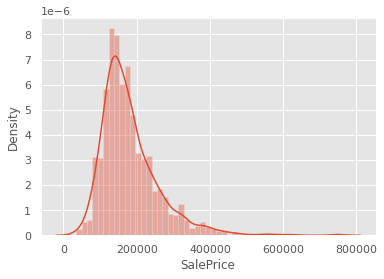

In [100]:
sns.distplot(train['SalePrice']);

In [101]:
scatter_data=pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
scatter_data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


To understand how sales price changes with respect to predictor variables. Out of many variables we can choose to illustrate how 

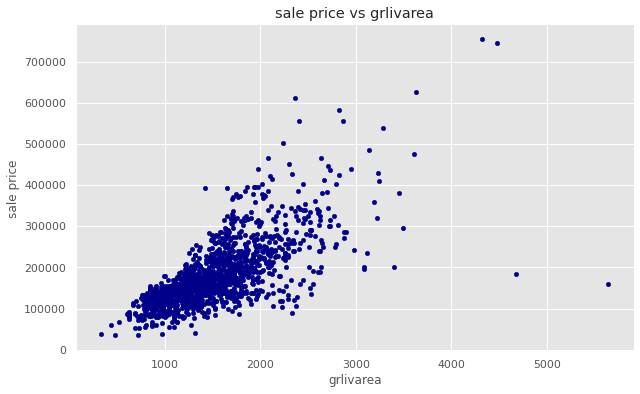

In [102]:
scatter_data.plot(kind='scatter', x='GrLivArea', y='SalePrice', figsize=(10, 6), color='darkblue')
plt.title('sale price vs grlivarea')
plt.xlabel('grlivarea')
plt.ylabel('sale price ')

plt.show()

In [103]:
scatter_data=pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
scatter_data.head()

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145


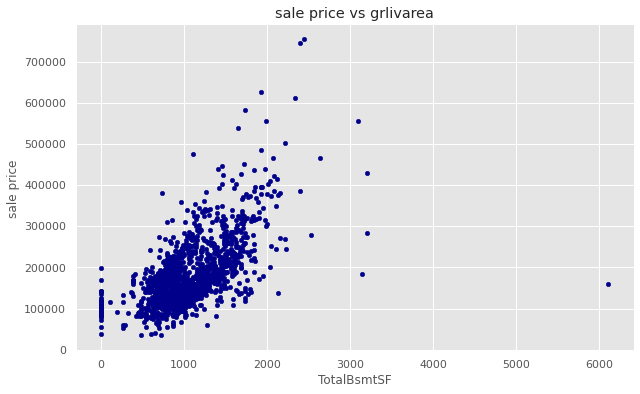

In [104]:
scatter_data.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', figsize=(10, 6), color='darkblue')

plt.title('sale price vs grlivarea')
plt.xlabel('TotalBsmtSF')
plt.ylabel('sale price ')

plt.show()

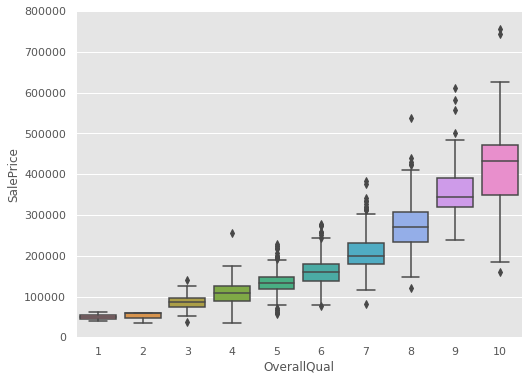

In [105]:
var = 'OverallQual'
data_box = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data_box)
fig.axis(ymin=0, ymax=800000);

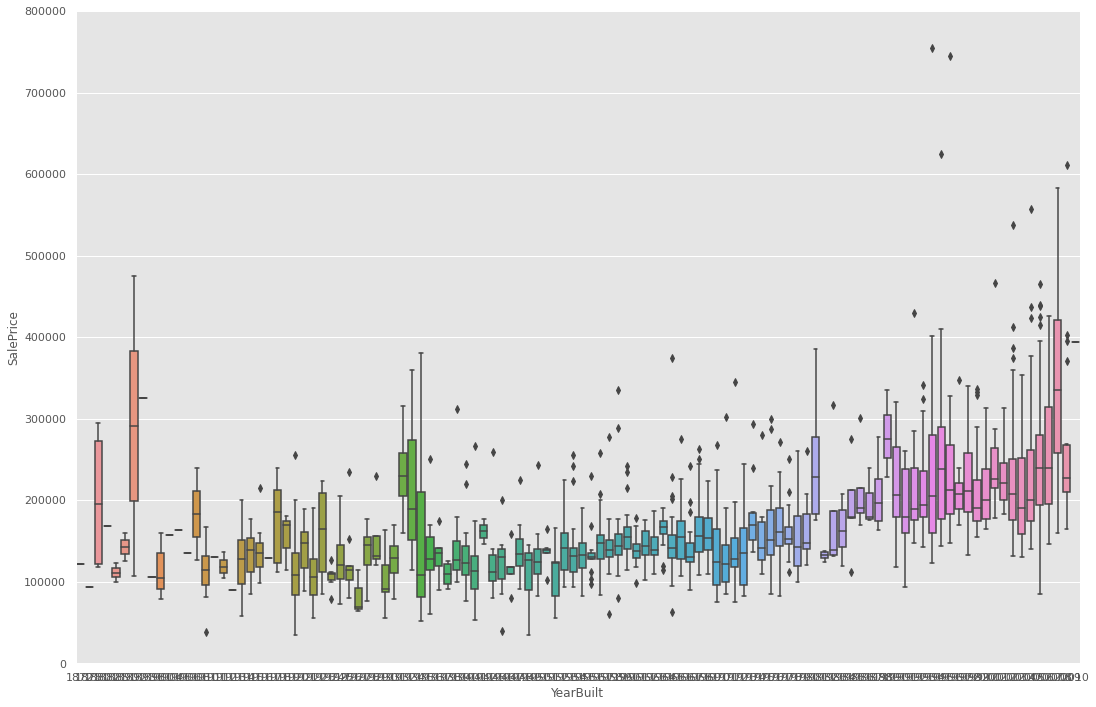

In [106]:
var = 'YearBuilt'
data_box = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data_box)
fig.axis(ymin=0, ymax=800000);

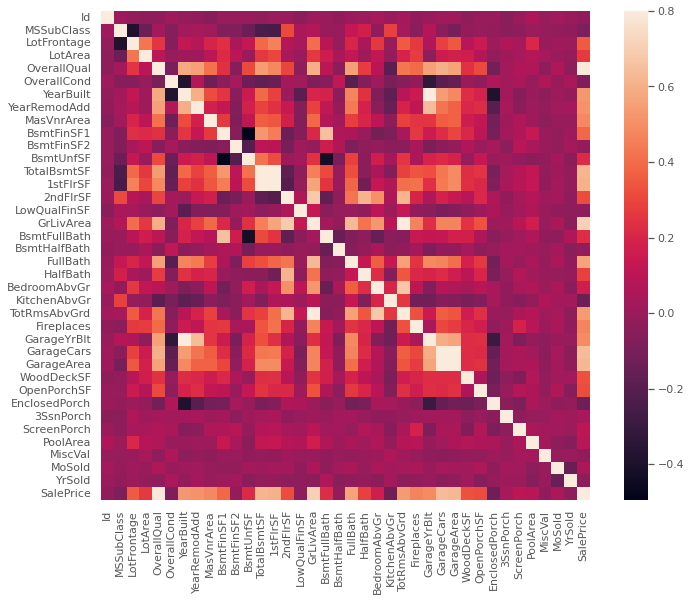

In [107]:
corrmat=train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

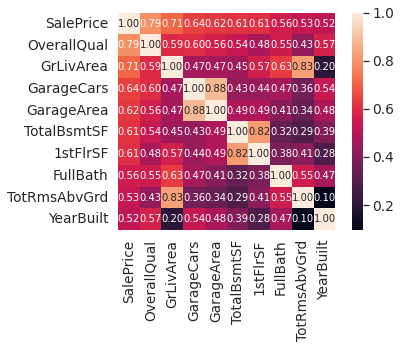

In [108]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm=train[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10})


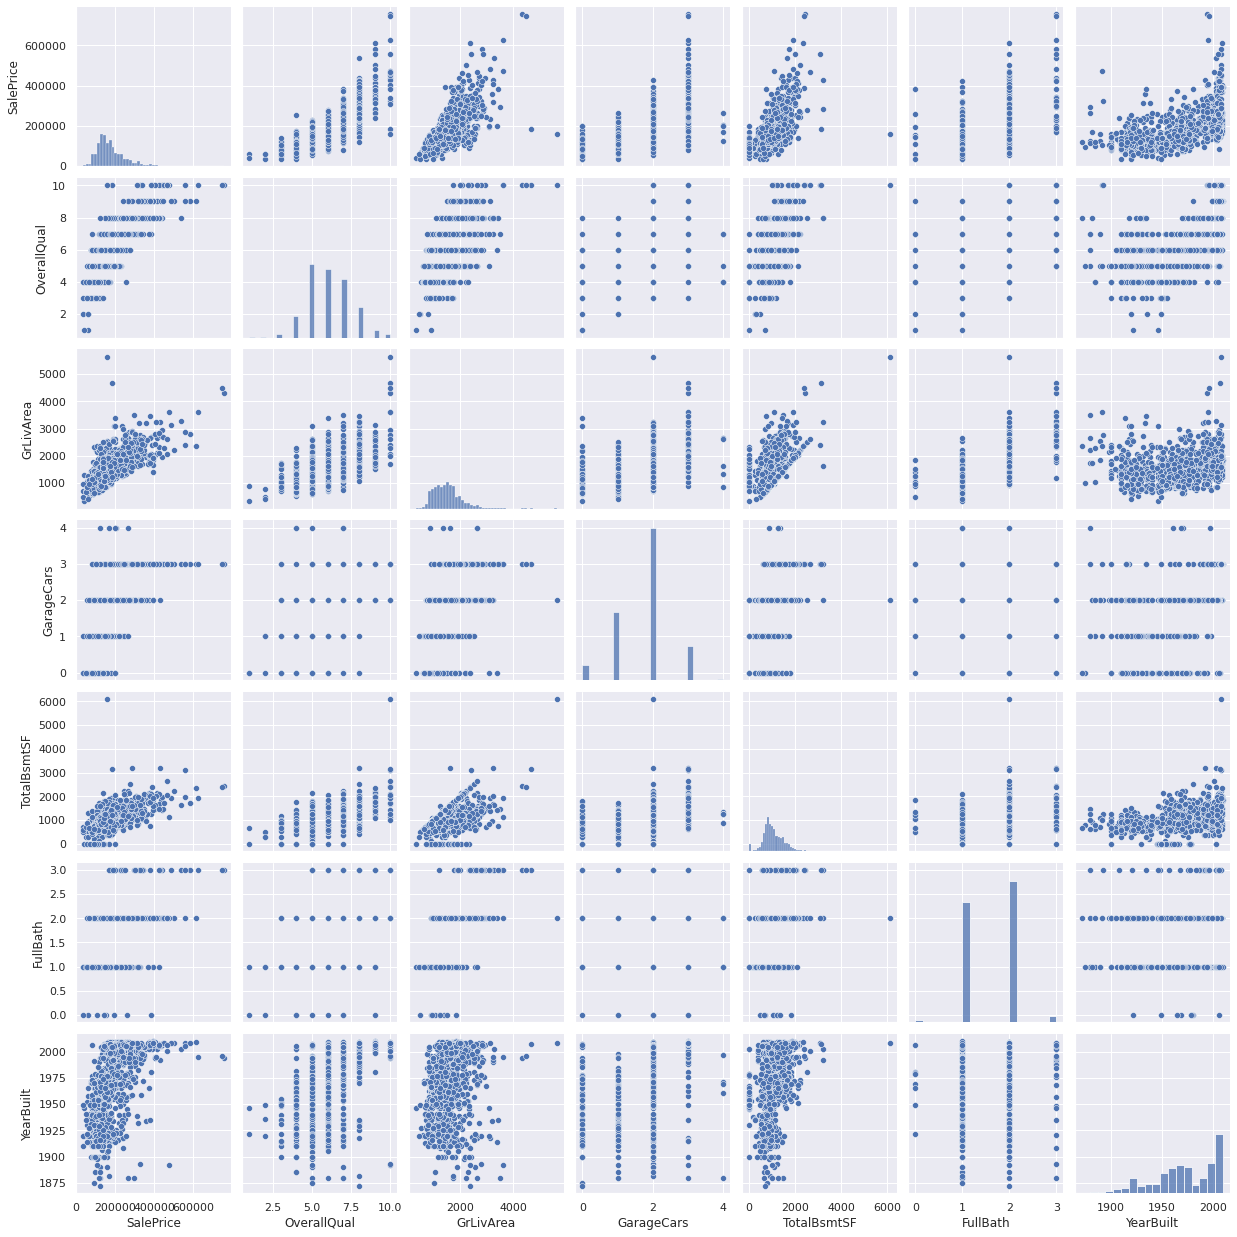

In [109]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [110]:
#saleprice_scaled = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis])

In [111]:
#saleprice_scaled2 = np.delete(saleprice_scaled, np.where(
#    (saleprice_scaled >=3))[0], axis=0)
#saleprice_scaled2[saleprice_scaled2>=3]

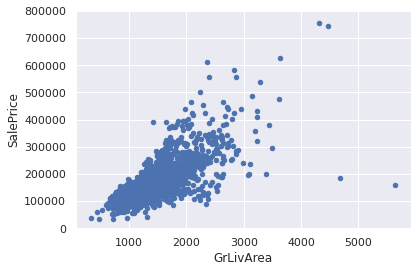

In [112]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data1 = pd.concat([train['SalePrice'], train[var]], axis=1)
data1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [113]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [114]:
train= train.drop(train[train['Id'] == 1298].index)
train= train.drop(train[train['Id'] == 523].index)

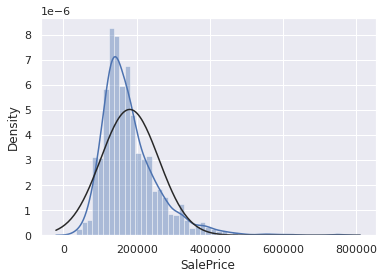

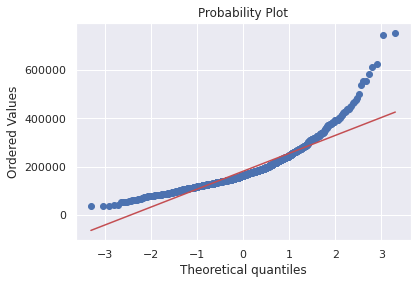

In [115]:
sns.distplot(train['SalePrice'],fit= norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

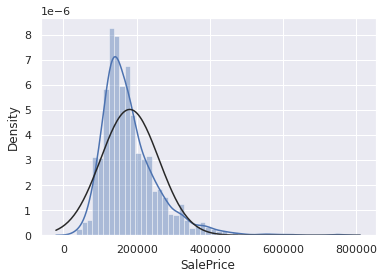

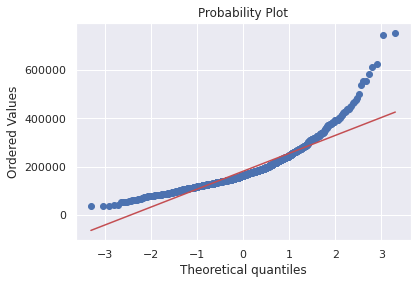

In [116]:
#applying log transformation
#train['SalePrice'] = np.log1p(train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [117]:
#histogram and normal probability plot
#sns.distplot(data['GrLivArea'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(data['GrLivArea'], plot=plt)

In [118]:
data=pd.concat((train, test))
y= train.SalePrice.values
data.drop(columns=['SalePrice'], inplace= True)
data.shape

(2917, 80)

In [119]:
data.shape

(2917, 80)

In [120]:
y= train.SalePrice.values
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

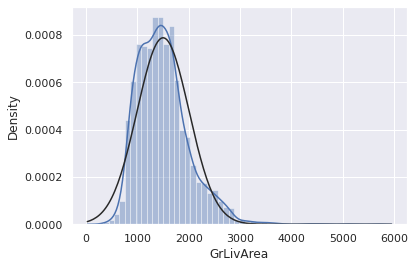

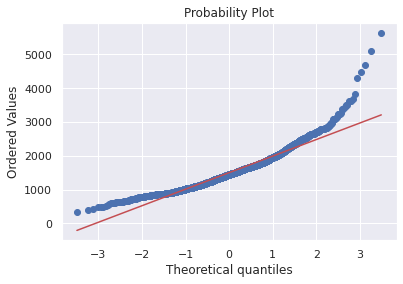

In [121]:
#applying log transformation
#data['GrLivArea'] = np.log(data['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

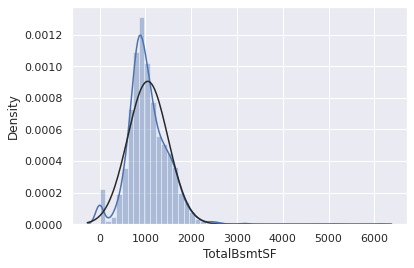

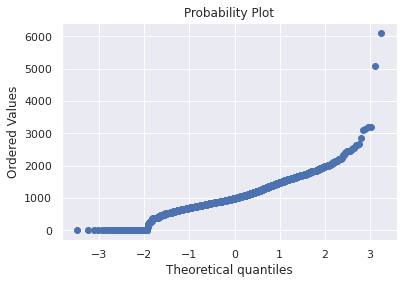

In [122]:
#histogram and normal probability plot
sns.distplot(data['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['TotalBsmtSF'], plot=plt)

In [123]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2907,0.996572
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1419,0.486459
LotFrontage,486,0.166610
GarageYrBlt,159,0.054508
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageCond,159,0.054508


**Missing value treatment**

**PoolQC** : data description says NA means "No Pool"

**MiscFeature**  : data description says NA means "no misc feature"

**Alley** : data description says NA means "no alley access"

**FireplaceQu** : data description says NA means "no fireplace"

**Fence** : data description says NA means "no fence"


In [124]:
data["PoolQC"] =data["PoolQC"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"]= data["Fence"].fillna("None")
data["FireplaceQu"]= data["FireplaceQu"].fillna("None")





In [125]:
data.columns
data.shape

(2917, 80)

It is assumed that  similar neighborhoods will be similar fromtage. Hence the median of frontage corresponding to a neighborhood has been used to imputed the missing value.

In [126]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

For the columns "GarageType","GarageFinish",'GarageQual', 'GarageCond' missing value implies the feature not being available. Hence considered as None". Will be later encoded as cetegorical using onehot encoding.

In [127]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] =data[col].fillna('None')

**GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [128]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [129]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :** For all these categorical basement-related features, NaN means that there is no basement.

In [130]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

**MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [131]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [132]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [133]:
data = data.drop(['Utilities'], axis=1)


In [134]:
data.shape

(2917, 79)

**Functional** : data description says NA means typical

In [135]:
data["Functional"] =data["Functional"].fillna("Typ")

**Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [136]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

**KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [137]:
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [138]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

**SaleType** : Fill in again with most frequent which is "WD"

In [139]:
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

**MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [140]:
data['MSSubClass'] = data['MSSubClass'].fillna("None")

Let's onfirm if there are still any missing values:

In [141]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head()

,Missing Ratio


Some categorical variables are represented in numerical variables. So lets transform them.

In [142]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)


Converting ordinal variables to preserve the order of the value. In other words, the quantitative values of variables increase corresponding to the variables' qualitative interpretation. For example for the variable, Kitchen quality, the label encoding can be custommised as shown below as suggested by [Koji ](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/comments)

In [143]:
#mapper = {'Ex': 4, 'Gd': 3, 'TA':2, 'Fa': 1}
#data['KitchenQual'] = data['KitchenQual'].map(mapper)


If we implement this for all such variables where, label encoding is appropriate than onehot encoding, [in this reference by mitra mirshafiee ](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/comments)

from sklearn.preprocessing import OrdinalEncoder
ord_fields=['MSSubClass','ExterQual','LotShape','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2','HeatingQC','Functional',
            'FireplaceQu','KitchenQual', 'GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
orders=[ ['20','30','40','45','50','60','70','75','80','85', '90','120','150','160','180',
    '190'],  ['Fa','TA','Gd','Ex'], ['Reg','IR1' ,'IR2','IR3'], 
 ['None','Fa','TA','Gd','Ex'], ['None','Po','Fa','TA','Gd','Ex'],
 ['None','No','Mn','Av','Gd'],['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 
'GLQ' ], ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ],
 ['Po','Fa','TA','Gd','Ex'],  ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
 ['None','Po','Fa','TA','Gd','Ex'],  ['Fa','TA','Gd','Ex'],
 ['None','Unf','RFn','Fin'],  ['None','Po','Fa','TA','Gd','Ex'],
['None','Po','Fa','TA','Gd','Ex'],
 ['None','Fa','Gd','Ex'], ['None','MnWw','GdWo','MnPrv','GdPrv'] ]
for i in range(len(orders)):     
    ord_en=OrdinalEncoder(categories = {0:orders[i]}) 
    data.loc[:,ord_fields[i]]=ord_en.fit_transform(data.loc[:,ord_fields[i]].values.reshape(-1,1))


In [144]:
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (2917, 79)


We can go with the label encoding for the other features that do not require ordinal encoding.
Features: 

In [145]:
from sklearn.preprocessing import LabelEncoder
#cols = ( 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 
   #     'YrSold', 'MoSold')
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (2917, 79)


In [146]:
c=data.dtypes
c.head(20)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street            int64
Alley             int64
LotShape          int64
LandContour      object
LotConfig        object
LandSlope         int64
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
dtype: object

We can drop the column Id so as to ignore it during modelling

In [147]:
data.drop(columns='Id', inplace= True)
data.shape

(2917, 78)

In [148]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data.shape

(2917, 79)

Let us proceed with the one hot encoding for all categorical features. pd.get_dummies , by default  creates one hot encoding for all variables of the class 'object'.

In [149]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
numeric_feats = data.dtypes[data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,16.892477
LotArea,12.824109
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002718
ScreenPorch,3.945101


In [150]:
skewness.index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'TotalSF', 'LotFrontage', '1stFlrSF', 'BsmtFinSF1',
       'GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd',
       'Fireplaces', 'HalfBath', 'BsmtFullBath', 'OverallCond', 'HeatingQC',
       'FireplaceQu', 'BedroomAbvGr', 'GarageArea', 'OverallQual', 'FullBath',
       'MSSubClass', 'YrSold', 'BsmtFinType1', 'GarageCars', 'YearRemodAdd',
       'BsmtQual', 'YearBuilt', 'GarageFinish', 'LotShape', 'MoSold', 'Alley',
       'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence', 'ExterCond',
       'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual', 'CentralAir',
       'GarageCond', 'GarageYrBlt', 'Functional', 'Street', 'PoolQC'],
      dtype='object')

In [151]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to  log transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
skewed_features = skewness.index
skewed_features
data[skewed_features]=np.log1p(data[skewed_features])
#lam = 0.15
#for feat in skewed_features:
 #    data[feat] = boxcox1p(data[feat], lam)

There are 59 skewed numerical features to  log transform


In [152]:
data = pd.get_dummies(data)
print(data.shape)


    

(2917, 221)


In [153]:
train_size= train.shape[0]
train_size

1458

We can unmerge the data into train and test as per the size of original train and test data set that was imported in first place.

In [154]:
X_train= data[:train_size]
y_train1= y[:train_size]
y_train = train.SalePrice.values
X_test=data[train_size:]


In [155]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [156]:
y_train1

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [157]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [158]:
train_size

1458

At this point , we are ready with the train and test data sets. 

In [159]:
X_train.shape

(1458, 221)

In [160]:
y.shape

(1458,)

In [161]:
data.shape

(2917, 221)

In [162]:
y_train.shape

(1458,)

In [163]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


0.9034955338368124

In [164]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(reg, X_train, y_train, cv=3))

[0.84979684 0.83132066 0.78102336]


In [165]:
from sklearn.linear_model import Lasso 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [166]:
X_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=221)

In [167]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [168]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [169]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [170]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 33942.5400 (4823.8066)



In [171]:
print(score)

[28826.05726151 33989.67077231 36845.28338261 28725.37140373
 41326.31713256]


Now that data is ready, we can go ahead with the modelling. Note that we have not done any transformations on the data like box-cox transformation to normalize the skewness of the distributions in different variables. One can attempt these tranformations  if not satified with the model performance.

**Residual plot:**  Since we are done with the modelling part, let us plot the residuals and check if they are normally distributed or not

array([-131877.35950687, -127281.32630978, -118948.27890125, ...,
        178628.45882506,  179610.2877755 ,  197073.5559911 ])

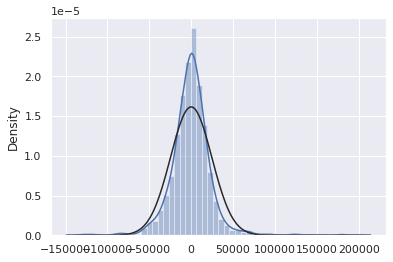

In [172]:
y_pred=reg.predict(X_train)
res= y_train-y_pred
sns.distplot(res, fit= norm)
res=np.sort(res)
res

**Linear regression 1st assumption**:  It can be observed that the residuals are closely alligned with the normal distribution . But is it enough to assuume that normal distribution is satified? 

**Q-Q plot:** Let us go ahead and call the Q-Q plot from statsmodels.api. 

array([-131877.35950687, -127281.32630978, -118948.27890125, ...,
        178628.45882506,  179610.2877755 ,  197073.5559911 ])

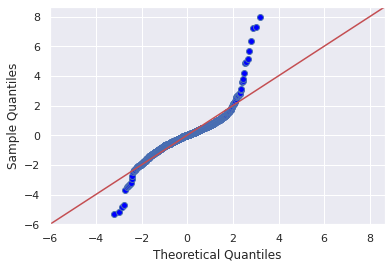

In [173]:
import statsmodels.api as sm
sm.qqplot(res,line='45',fit=True,dist=stats.norm)
res


**Probplot**: Now there is the other version of illustrating the same point . That is by calling the probplot from ScikitLearn.

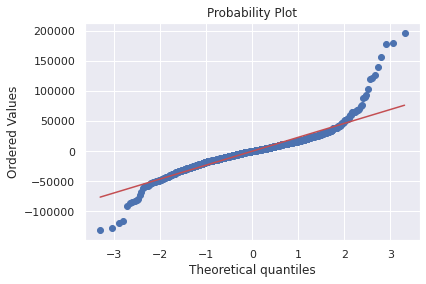

In [174]:
residuals = stats.probplot(res, plot=plt)

The plots suggest some kind of non -linear behaviour of normalized residuals. So there is an indication that the normality assumption of Linear regression hasn't been satisfied well. Let us cplot the distribution of the response variable "SalePrice". 

<AxesSubplot:ylabel='Density'>

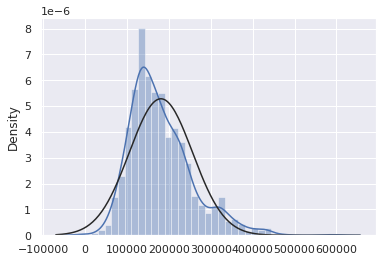

In [175]:
sns.distplot(y_pred, fit= norm)

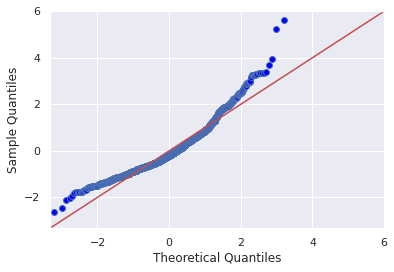

In [176]:
fig=sm.qqplot(y_pred,line='45',fit=True,dist=stats.norm)

According to Central Limit Theorem, the distribution should be Normal. But we can see that there are soe visible deviations from the expected behaviour. Let us consider some tranformations on respnse variable 'SalePrice'

<AxesSubplot:ylabel='Density'>

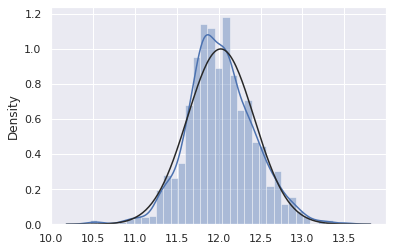

In [177]:
y_train_transf=np.log1p(y_train)
sns.distplot(y_train_transf, fit= norm)

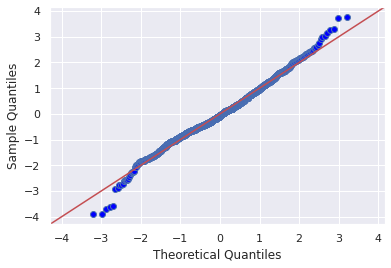

In [178]:
fig=sm.qqplot(y_train_transf,line='45',fit=True,dist=stats.norm)

We can observe that, after the transfromation, the distribution of saleprice approaches closer to normal distribution, How does this affect the prediction, Let's see.

In [179]:
reg = LinearRegression().fit(X_train, y_train_transf)
reg.score(X_train, y_train_transf)

0.9399926441330227

<AxesSubplot:ylabel='Density'>

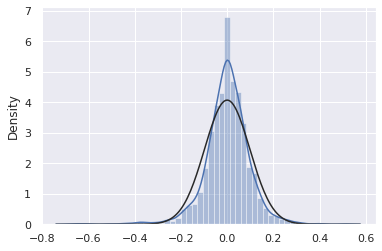

In [180]:
y_pred=reg.predict(X_train)
res= y_train_transf-y_pred
sns.distplot(res, fit= norm)


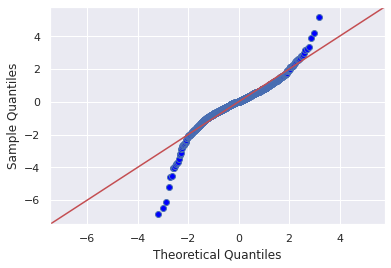

In [181]:
fig=sm.qqplot(res,line='45',fit=True,dist=stats.norm)

The distribution of residuals is comparitively more normal than the previous un-transformed version. But not close enough to be called as standard normal distribution. So let's check for the other assumptions of linear regression proceeding to **"homoscedasticity"**.


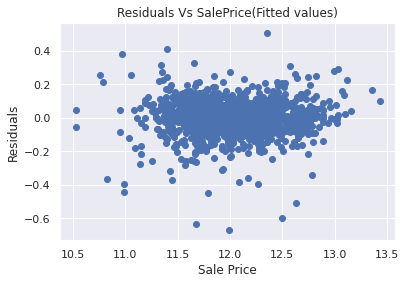

In [182]:
##scatter_data=pd.concat(res,y_train)
#scatterdata
plt.scatter(y_pred, res)
plt.xlabel("Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals Vs SalePrice(Fitted values)")
plt.show()

**Homoscedasticity :**
 From the above plot, of Residuals vs Fitted values, it appears that there is no strong sense of variation in residuals w.r.t. fitted values

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train.values, i)
                          for i in range(len(train.columns))]


In [203]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [199]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_tr.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

,feature,VIF
40,GarageYrBlt,1.241891e+05
59,MSZoning_C (all),inf
60,MSZoning_FV,inf
61,MSZoning_RH,inf
62,MSZoning_RL,inf
...,...,...
216,SaleCondition_AdjLand,inf
217,SaleCondition_Alloca,inf
218,SaleCondition_Family,inf
219,SaleCondition_Normal,inf
